In [2]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
# import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

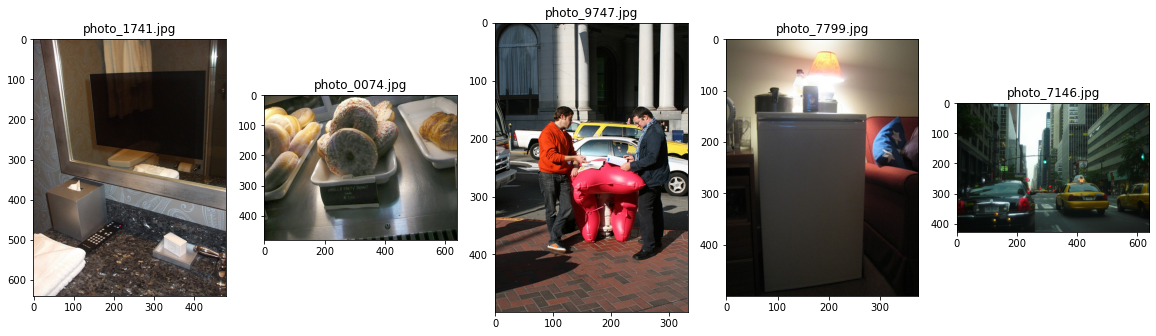

In [3]:
plt.figure(figsize=(20,20))

test_folder=r'../data/Photo'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [4]:
IMG_WIDTH=180
IMG_HEIGHT=180
img_folder=r'../data/'

In [5]:
ds_test=tf.keras.preprocessing.image_dataset_from_directory(
    img_folder,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(IMG_WIDTH,IMG_HEIGHT),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation",
    interpolation='bilinear',
    follow_links=False,
)
ds_train=tf.keras.preprocessing.image_dataset_from_directory(
    img_folder,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(IMG_WIDTH,IMG_HEIGHT),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training",
    interpolation='bilinear',
    follow_links=False,
)

Found 41406 files belonging to 5 classes.
Using 8281 files for validation.
Found 41406 files belonging to 5 classes.
Using 33125 files for training.


In [6]:
class_names =  ds_train.class_names
print(class_names)

['Painting', 'Photo', 'Schematics', 'Sketch', 'Text']


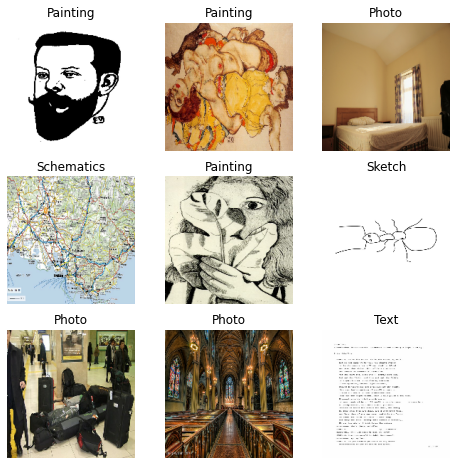

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for images, labels in ds_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [8]:
images, labels = next(iter(ds_train))
print(images.shape)
print(labels.shape)

(32, 180, 180, 3)
(32,)
